# Tensorboard

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
num_classes = 10

#load data
mnist = keras.datasets.mnist

#split between train and validation sets
(x_train, y_train), (x_val, y_val) = mnist.load_data()

#convert images into one dimension from 28x28 pixels
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

#convert labels to one-hot vectors
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

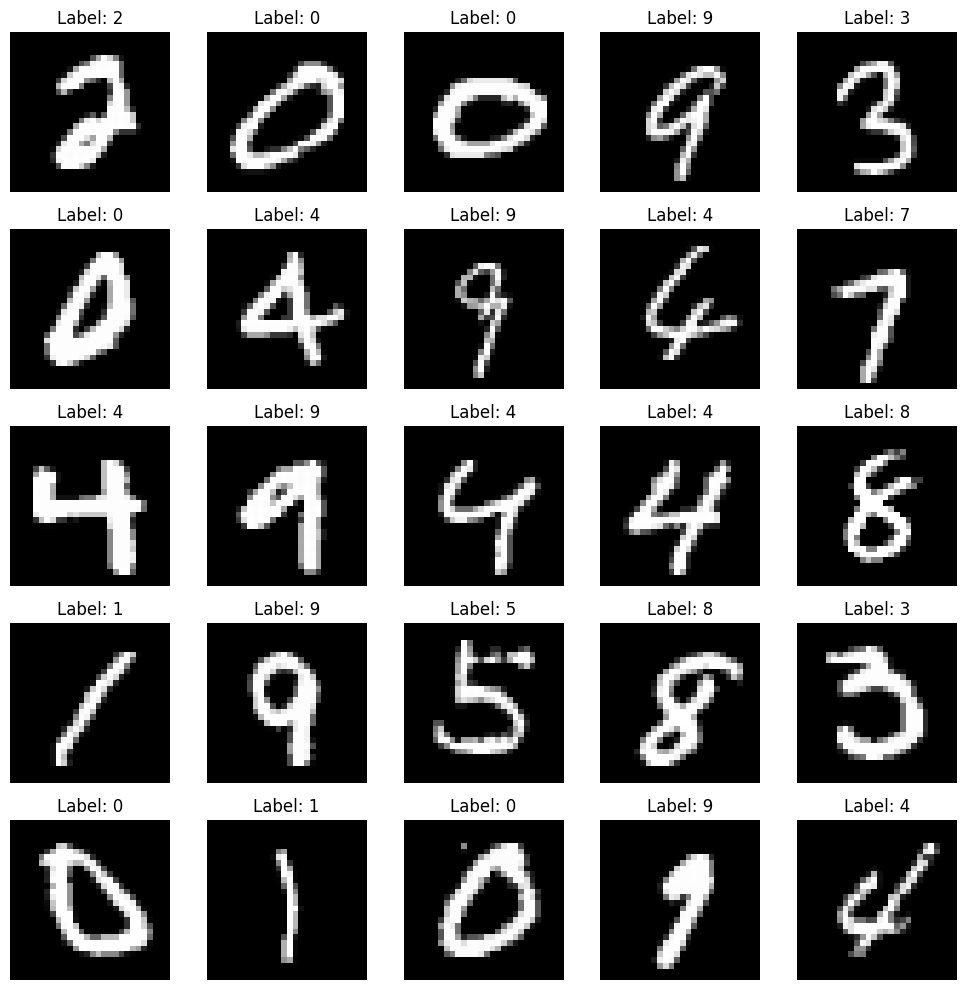

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, labels, num_rows=5, num_cols=5, figsize=(10,10)):
    indices = np.random.choice(range(len(images)), num_rows * num_cols, replace=False)

    plt.figure(figsize=figsize)
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        image = images[indices[i]].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f'Label: {np.argmax(labels[indices[i]])}') 
    plt.tight_layout()
    plt.show()

display_images(x_train, y_train)

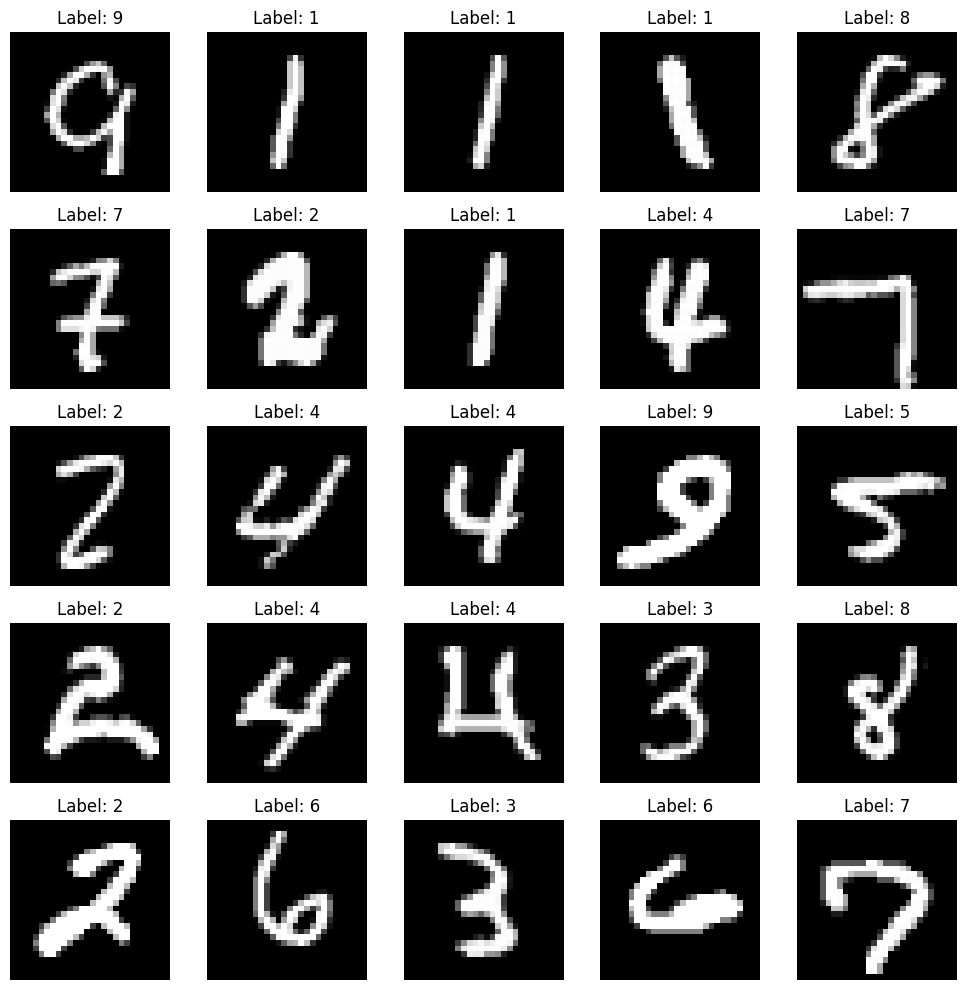

In [4]:
display_images(x_val, y_val)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(28*28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [13]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
checkpointer = ModelCheckpoint(filepath=datetime.now().strftime("%Y%m%d-%H%M%S")+".hdf5", monitor="val_loss", verbose=1, save_best_only=True)
#train model
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    batch_size=4,
                    epochs=50,
                    callbacks=[checkpointer, tensorboard_callback])

Epoch 1/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9781
Epoch 1: val_loss improved from inf to 0.06425, saving model to 20240123-171818.hdf5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 2/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9792
Epoch 2: val_loss improved from 0.06425 to 0.05972, saving model to 20240123-171818.hdf5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0627 - accuracy: 0.9792 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 3/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.0624 - accuracy: 0.9798
Epoch 3: val_loss did not improve from 0.05972
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0623 - accuracy: 0.9798 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 4/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.0612 - a

1500/1500 [==============================] - 9s 6ms/step - loss: 0.0511 - accuracy: 0.9832 - val_loss: 0.0599 - val_accuracy: 0.9834
Epoch 30/50
1492/1500 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9821
Epoch 30: val_loss did not improve from 0.05192
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0547 - accuracy: 0.9821 - val_loss: 0.0600 - val_accuracy: 0.9820
Epoch 31/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9829
Epoch 31: val_loss did not improve from 0.05192
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0518 - accuracy: 0.9829 - val_loss: 0.0585 - val_accuracy: 0.9840
Epoch 32/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9834
Epoch 32: val_loss did not improve from 0.05192
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0502 - accuracy: 0.9835 - val_loss: 0.0589 - val_accuracy: 0.9836
Epoch 33/50
1494/1500 [====

In [8]:
%load_ext tensorboard

In [9]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6006 (pid 38188), started 0:45:36 ago. (Use '!kill 38188' to kill it.)

In [10]:
score = model.evaluate(x_val, y_val, verbose=0)

print("\nScore : ",score)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Score :  [0.05605630949139595, 0.9843999743461609]
Test loss: 0.05605630949139595
Test accuracy: 0.9843999743461609


In [15]:
y_pred = model.predict(x_val, batch_size=4, verbose=1)
y_pred

2500/2500 [==============================] - 4s 1ms/step


array([[1.73747718e-08, 1.18030705e-08, 8.39427457e-07, ...,
        9.99989986e-01, 7.95845807e-08, 8.49401385e-06],
       [4.51434334e-10, 2.09475820e-05, 9.99978781e-01, ...,
        9.30230115e-09, 6.46845422e-08, 5.68308252e-14],
       [2.64011248e-08, 9.99996662e-01, 1.87320879e-07, ...,
        1.80318773e-06, 6.44378474e-07, 2.92967584e-09],
       ...,
       [8.85456124e-14, 3.51351136e-11, 3.76272716e-13, ...,
        8.26379054e-09, 3.15304831e-08, 7.48050184e-07],
       [6.74187581e-11, 3.80108750e-10, 3.20760675e-11, ...,
        1.16435528e-08, 5.06178537e-07, 8.92668806e-13],
       [7.55539076e-10, 5.24810942e-14, 9.52251841e-13, ...,
        7.76157892e-13, 2.97436320e-09, 1.72316286e-10]], dtype=float32)

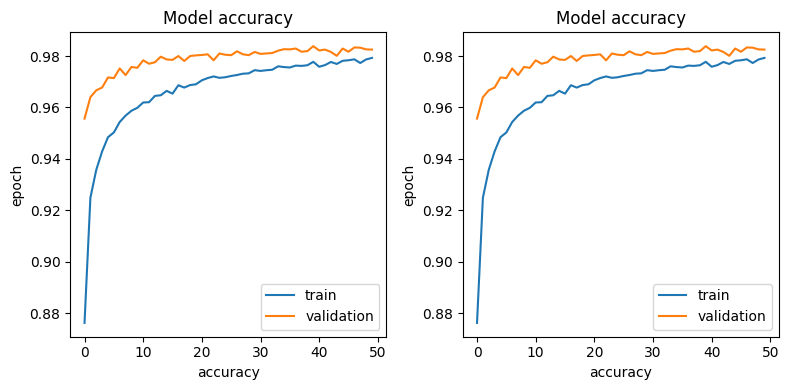

In [11]:
#ploting
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title("Model accuracy")
plt.xlabel("accuracy")
plt.ylabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title("Model accuracy")
plt.xlabel("accuracy")
plt.ylabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 24ms/step


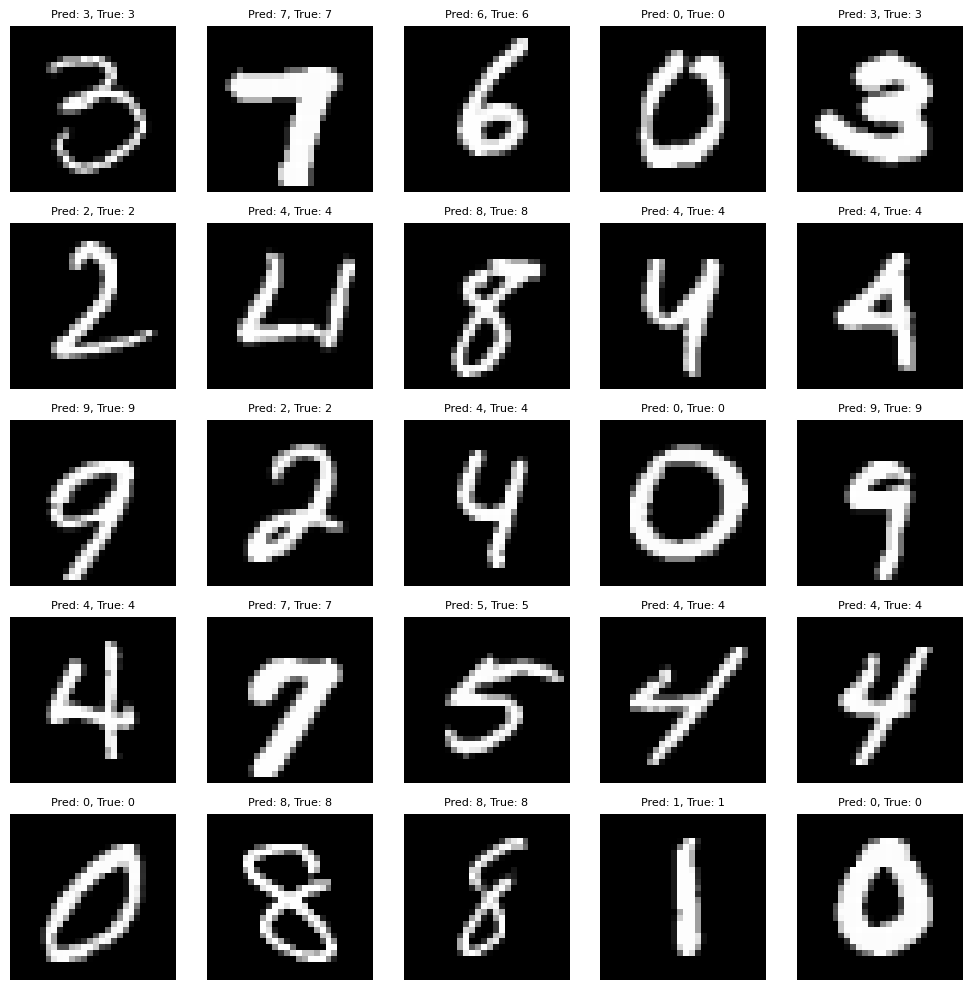

In [12]:
def display_predictions(model, images, true_labels, num_rows=5, num_cols=5, figsize=(10,10)):
    """
    Affiche les images avec les prédictions et les vraies étiquettes.

    Args:
    model (keras.Model): Le modèle entraîné pour les prédictions.
    images (numpy.array): Le tableau des images.
    true_labels (numpy.array): Les vraies étiquettes des images.
    num_rows (int): Nombre de lignes dans la grille.
    num_cols (int): Nombre de colonnes dans la grille.
    figsize (tuple): Taille de la figure pour la visualisation.
    """
    indices = np.random.choice(range(len(images)), num_rows * num_cols, replace=False)

    plt.figure(figsize=figsize)
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        image = images[indices[i]].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        pred = model.predict(images[indices[i]].reshape(1, -1))
        pred_label = np.argmax(pred)

        true_label = np.argmax(true_labels[indices[i]])
        plt.title(f'Pred: {pred_label}, True: {true_label}', fontsize=8)
    plt.tight_layout()
    plt.show()


display_predictions(model, x_val, y_val)
